In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

In [2]:
LambdaCDM = Class()
LambdaCDM.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':100.0})
LambdaCDM.compute()
kk = np.logspace(-4,np.log10(100),100)
Pk = []
h  = LambdaCDM.h()
for k in kk: 
    Pk.append(LambdaCDM.pk(k,0.))

    
LambdaCDM.struct_cleanup()
LambdaCDM.empty() 

In [3]:
values = np.load('CLASS_Values.npz', allow_pickle = True)

pk = values['Class_values'].item()['pk']
k = values['Class_values'].item()['k']

cdm_values = np.load('CDM_CLASS_Values.npz', allow_pickle = True)

pk_cdm = cdm_values['Class_values'].item()['pk']
k_cdm = cdm_values['Class_values'].item()['k']

In [24]:
diff_frac = list()
for item1, item2 in zip(pk, Pk):
    item = (item1 - item2)/item2
    diff_frac.append(item)

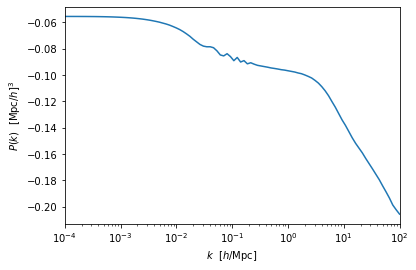

In [30]:
plt.figure(2)
plt.xscale('log');plt.yscale('linear');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
#plt.plot(kk,Pk,'c-')

#plt.loglog(k,pk, linestyle = '--')
plt.semilogx(kk,diff_frac)
plt.savefig('inital_fig.png')
plt.show()